[Home](../../README.md)

### Model Training - Linear Regression

Linear regression assumes the data has a linear pattern. If your data does not have a linear pattern you can consider a polynomial regression algorithm that provides a multi (poly) coefficient linear relationship between an independent variable and a dependent variable to predict the outcome of price. We will now Train a Polynomial regression algorithm on the features you have engineered to see how closely we can predict the house prices based off the given and created features

- For our context, it is clear more terms with higher coefficients will required, as a simple linear equation cannot potray the relationship between our features and the target.

#### Step 1

Load the required dependencies:

In [3]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

#### Step 2

Store the data columns for Linear Regression.

In [4]:
# Create a data frame from the csv file
training_data = pd.read_csv('../A_Model_Training/A_training_data_new.csv')

x_name = ['num_bath','num_bed','num_parking','property_size','suburb_lat','suburb_lng','km_from_cbd','ds_float','tot_rooms','prop_cbd']
y_name = 'Target'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

#### Step 3

Plot the feature `x` and target `y` data on a graph using the column headings as the graph labels.

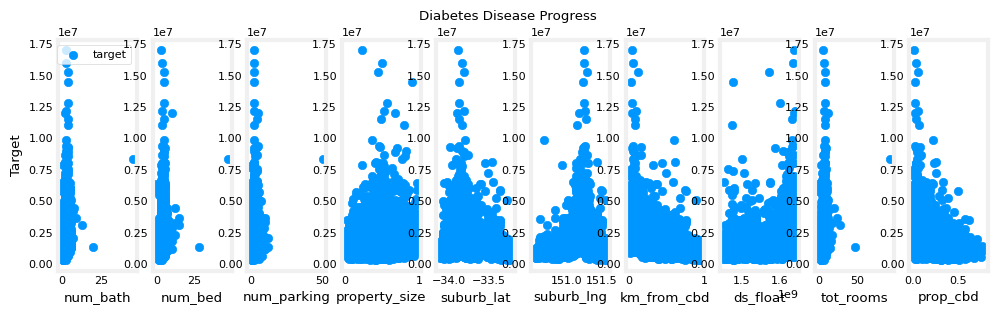

In [5]:
if(len(x_name) == 1):
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Diabetes Disease Progress")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3))
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("Diabetes Disease Progress")
plt.show()

#### Step 4

Then save an instance of PolynomialFeatures, adjust the 'degree' parameter to suit your model and create the feature using the data in 'x'. (Note a degree of 1 is linear regression, each extra degree adds a coefficient).

Then use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a Machine Learning model class and store it in the `my_model` variable as an object.

In [6]:
poly = PolynomialFeatures(degree=8, include_bias=False)
poly_features = poly.fit_transform(x)

# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(poly_features, y)

LinearRegression()

#### Step 5

Plot the features, targets and model (linear regression).

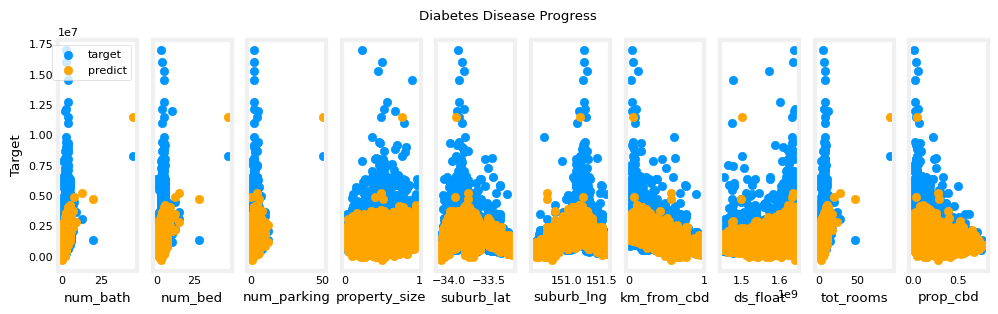

In [7]:
y_pred = my_model.predict(poly_features)
if(len(x_name) == 1):
    plt.scatter(x, y_pred)
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Diabetes Disease Progress")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
        ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("Diabetes Disease Progress")
plt.show()

In [8]:
#save the model to disk
filename = 'A_PR_model_v6.sav'
pickle.dump(my_model, open('../Model_Testing_and_Validation/PolynomialRegression_Models/' + filename, 'wb'))

In [9]:
filename = '../Model_Testing_and_Validation/PolynomialRegression_Models/A_PR_model_v6.sav'
model_C = pickle.load(open(filename, 'rb'))

In [10]:
mx_col = ['num_bath','num_bed','num_parking','property_size','suburb_lat','suburb_lng','km_from_cbd','ds_float','tot_rooms','prop_cbd']
testing_data = pd.read_csv('../Model_Testing_and_Validation/A_testing_data_new.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

In [13]:
my_test.shape

(2334, 1)

ValueError: x and y must be the same size

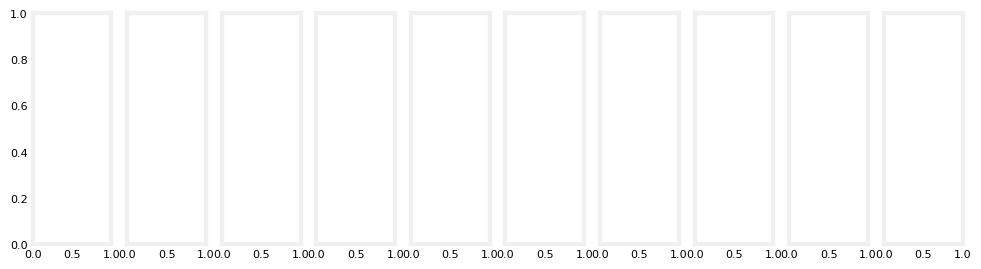

In [14]:
my_pred = model_C.predict(poly_features)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(poly_features[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(poly_features[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [15]:
test_score = model_C.score(poly_features, my_test)
print(f'Training data score: {test_score}')

ValueError: Found input variables with inconsistent numbers of samples: [2334, 7002]